### Auto MPG 데이터셋을 사용하여 1970년대 후반과 1980년대 초반의 자동차 연비를 예측하는 모델을 만듭니다. 이 정보에는 실린더 수, 배기량, 마력(horsepower), 공차 중량 같은 속성이 포함됩니다.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 구글 드라이브 마운트


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Working Directory 설정


In [4]:
import os
os.chdir('/content/drive/MyDrive/data')

파일은 auto-mpg.csv 입니다.

In [5]:
df = pd.read_csv('auto-mpg.csv')

In [6]:
df.head()

,mpg,cyl,displ,hp,weight,accel,yr,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [7]:
df.isna().sum()

,0
mpg,0
cyl,0
displ,0
hp,0
weight,0
accel,0
yr,0
origin,0
name,0


In [8]:
y = df['mpg']

In [9]:
X = df.loc[ : ,'cyl' : 'origin' ]

In [10]:
X.head(2)

,cyl,displ,hp,weight,accel,yr,origin
0,8,307.0,130,3504,12.0,70,1
1,8,350.0,165,3693,11.5,70,1


In [11]:
y.head()

,mpg
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0


In [12]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [13]:
sc_X = MinMaxScaler()
sc_y = MinMaxScaler()

In [14]:
X_scaled = sc_X.fit_transform(X)

In [15]:
y.shape

(392,)

In [16]:
y.values.reshape(-1,1)

array([[18. ],
       [15. ],
       [18. ],
       [16. ],
       [17. ],
       [15. ],
       [14. ],
       [14. ],
       [14. ],
       [15. ],
       [15. ],
       [14. ],
       [15. ],
       [14. ],
       [24. ],
       [22. ],
       [18. ],
       [21. ],
       [27. ],
       [26. ],
       [25. ],
       [24. ],
       [25. ],
       [26. ],
       [21. ],
       [10. ],
       [10. ],
       [11. ],
       [ 9. ],
       [27. ],
       [28. ],
       [25. ],
       [19. ],
       [16. ],
       [17. ],
       [19. ],
       [18. ],
       [14. ],
       [14. ],
       [14. ],
       [14. ],
       [12. ],
       [13. ],
       [13. ],
       [18. ],
       [22. ],
       [19. ],
       [18. ],
       [23. ],
       [28. ],
       [30. ],
       [30. ],
       [31. ],
       [35. ],
       [27. ],
       [26. ],
       [24. ],
       [25. ],
       [23. ],
       [20. ],
       [21. ],
       [13. ],
       [14. ],
       [15. ],
       [14. ],
       [17. ],
       [11

In [17]:
y_scaled = sc_y.fit_transform(y.values.reshape(-1,1))

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

In [20]:
# 딥러닝 모델링

In [21]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import MeanSquaredError


In [23]:
def build_model(input_dim):
    model = Sequential()
    model.add(keras.Input(shape=(input_dim,)))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='linear'))

    model.compile(
        optimizer=keras.optimizers.Adam(),                  # 문자열 대신 객체
        loss=keras.losses.MeanSquaredError(),               # 문자열 대신 객체
        metrics=[keras.metrics.MeanAbsoluteError()]         # 이미 안전하게 객체 사용 중
    )
    return model



In [24]:
model = build_model( X_train.shape[1] )

In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,737 (18.50 KB)

 Trainable params: 4,737 (18.50 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
X_train.shape

(313, 7)

In [27]:
history = model.fit(X_train, y_train, epochs=100, validation_split= 0.2 )

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1800 - mean_absolute_error: 0.3608 - val_loss: 0.0745 - val_mean_absolute_error: 0.2344
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0532 - mean_absolute_error: 0.1968 - val_loss: 0.0337 - val_mean_absolute_error: 0.1635
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0285 - mean_absolute_error: 0.1400 - val_loss: 0.0175 - val_mean_absolute_error: 0.1035
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0151 - mean_absolute_error: 0.0943 - val_loss: 0.0146 - val_mean_absolute_error: 0.0953
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0119 - mean_absolute_error: 0.0878 - val_loss: 0.0114 - val_mean_absolute_error: 0.0827
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0124 - mean_absolute_error: 0.0868 - val_loss: 0.0104 - val_mean_absolute_error: 0.0786
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0104 - mean_absolute_error: 0.0796 - val_loss: 0.0106 - v

In [30]:
history.history

{'loss': [0.13454213738441467,
  0.04983694851398468,
  0.022659271955490112,
  0.014013874344527721,
  0.012254907749593258,
  0.011045299470424652,
  0.009778487496078014,
  0.009013722650706768,
  0.008594125509262085,
  0.008283824659883976,
  0.007928872480988503,
  0.007656187750399113,
  0.0074595133773982525,
  0.007422483526170254,
  0.007193179335445166,
  0.006954431068152189,
  0.006897284183651209,
  0.006691730581223965,
  0.006791973486542702,
  0.006680516060441732,
  0.006514278706163168,
  0.00620665680617094,
  0.006341428030282259,
  0.006139158271253109,
  0.006078131031244993,
  0.005961243528872728,
  0.0058623794466257095,
  0.005800991784781218,
  0.0058354889042675495,
  0.005632404237985611,
  0.0056349243968725204,
  0.00551364803686738,
  0.005428893491625786,
  0.005464974325150251,
  0.00538457790389657,
  0.005236960481852293,
  0.00520707480609417,
  0.005406578071415424,
  0.00524101173505187,
  0.005230247043073177,
  0.00520281819626689,
  0.00543573

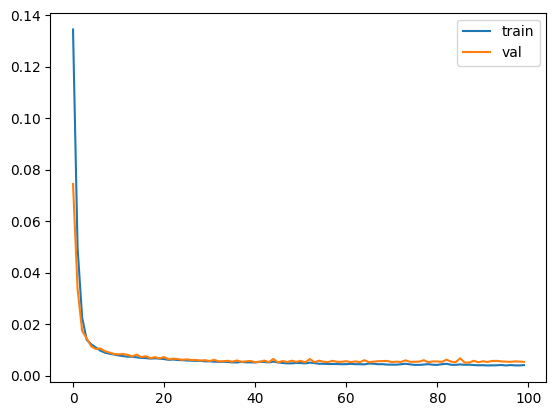

In [32]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train', 'val'])
plt.show()

이 그래프를 보면 수 백번 에포크를 진행한 이후에는 모델이 거의 향상되지 않는 것 같습니다. model.fit 메서드를 수정하여 검증 점수가 향상되지 않으면 자동으로 훈련을 멈추도록 만들어 보죠. 에포크마다 훈련 상태를 점검하기 위해 EarlyStopping 콜백(callback)을 사용하겠습니다. 지정된 에포크 횟수 동안 성능 향상이 없으면 자동으로 훈련이 멈춥니다.

이 콜백에 대해 더 자세한 내용은 여기를 참고하세요.[링크 텍스트](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping)

In [33]:
from tensorflow.keras.callbacks import EarlyStopping

In [34]:
model = build_model( X_train.shape[1] )

In [35]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,737 (18.50 KB)

 Trainable params: 4,737 (18.50 KB)

 Non-trainable params: 0 (0.00 B)

In [36]:
early_stopping = EarlyStopping(monitor='val_loss', mode='min', patience=10, restore_best_weights= True)

In [37]:
history2 = model.fit(X_train, y_train, epochs=100000, validation_split=0.2, callbacks= [early_stopping] )

Epoch 1/100000
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1946 - mean_absolute_error: 0.3936 - val_loss: 0.0951 - val_mean_absolute_error: 0.2573
Epoch 2/100000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0615 - mean_absolute_error: 0.1902 - val_loss: 0.0358 - val_mean_absolute_error: 0.1571
Epoch 3/100000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0366 - mean_absolute_error: 0.1609 - val_loss: 0.0220 - val_mean_absolute_error: 0.1200
Epoch 4/100000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0215 - mean_absolute_error: 0.1223 - val_loss: 0.0157 - val_mean_absolute_error: 0.0961
Epoch 5/100000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0167 - mean_absolute_error: 0.0924 - val_loss: 0.0150 - val_mean_absolute_error: 0.0999
Epoch 6/100000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0121 - mean_absolute_error: 0.0866 - val_loss: 0.0113 - val_mean_absolute_error: 0.0861
Epoch 7/100000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0118 - mean_absolute_error: 0.086

In [38]:
model.evaluate(X_test, y_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0046 - mean_absolute_error: 0.0498


[0.00489653367549181, 0.05069506913423538]

In [39]:
model.save('mpg_model.keras')

In [40]:
model2 = keras.models.load_model('mpg_model.keras')

In [41]:
model2.evaluate(X_test, y_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0046 - mean_absolute_error: 0.0498 


[0.00489653367549181, 0.05069506913423538]

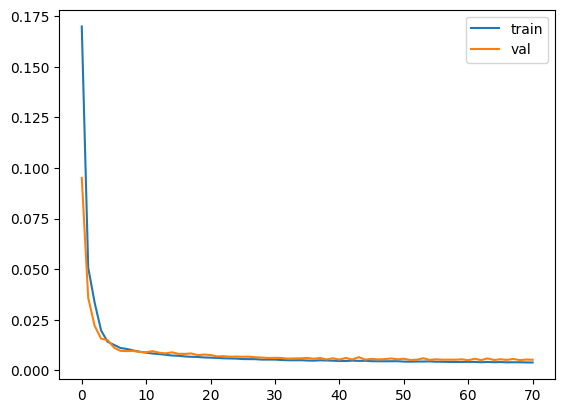

In [42]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.legend(['train', 'val'])
plt.show()